# 2 Data wrangling<a id='2_Data_wrangling'></a>

## Contents
[2.1 Introduction](#2.1)
* [2.1.1 Data Science Problem](#2.1.1)
* [2.1.2 Data Source](#2.1.2)
* [2.1.3 Objectives](#2.1.3)

[2.2 Data Collection](#2.2)

## 2.1 Introduction<a id='2.1'></a>

### 2.1.1 Data Science Problem<a id='2.1.1'></a>

Student’s performance is the key to the education. This project is to expore the influencing factors in student’s performance and derive a model to predict student’s performance with given key features.

### 2.1.2 Data Source<a id='2.1.2'></a>

Student Performance Data was obtained in a survey of students' math course in secondary school. It consists of 33 Column Dataset Contains Features like gender, age, size of family, Father education, Mother education, Occupation of Father and Mother, Family Relation, Health, and Grades, etc. 

The data can be found from [here](https://www.kaggle.com/datasets/devansodariya/student-performance-data).
The data column names can be found from [here](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

### 2.1.3 Objectives<a id='2.1.3'></a>

The objectives of this project are to explore:

* What are key feactures impacting student's grade?
* What measures can be taken to improve student's `final year grade G3`?

## 2.2 Data Collection<a id='2.2'></a>

In [135]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
from pandas_profiling import ProfileReport


In [136]:
# check the current path
%pwd

'c:\\DS\\Github\\Capstone-2\\Notebook'

In [137]:
# the CSV data is collected from kaggle 
student_data = pd.read_csv('..\data\student_data.csv')
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The `data column names` are imported to understand the data.

In [140]:
# input student data column information which are available at UCI Machine Learning Repository.
col_info = pd.read_csv('..\data\data_columns.csv').T
col_info.columns = col_info.iloc[1]
col_info = col_info.drop(index = ['order','name'], axis=0)
# use the code below to decode the column name explanation
print(col_info.higher)

col_info.head()

meaning     wants to take higher education 
notes                     binary: yes or no
Name: higher, dtype: object


name,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
meaning,student's school,student's sex,student's age,student's home address type,family size,parent's cohabitation status,mother's education,father's education,mother's job,father's job,...,quality of family relationships,free time after school,going out with friends,workday alcohol consumption,weekend alcohol consumption,current health status,number of school absences,first period grade,second period grade,final grade
notes,binary: 'GP' - Gabriel Pereira or 'MS' - Mousi...,binary: 'F' - female or 'M' - male,numeric: from 15 to 22,binary: 'U' - urban or 'R' - rural,binary: 'LE3' - less or equal to 3 or 'GT3' - ...,binary: 'T' - living together or 'A' - apart,"numeric: 0 - none, 1 - primary education 4th g...","numeric: 0 - none, 1 - primary education 4th g...","nominal: 'teacher', 'health' care related, civ...","nominal: 'teacher', 'health' care related, civ...",...,numeric: from 1 - very bad to 5 - excellent,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very bad to 5 - very good,numeric: from 0 to 93,numeric: from 0 to 20,numeric: from 0 to 20,"numeric: from 0 to 20, output target"


## 2.3 Data Organization<a id='2.3'></a>

This notebook and its associated data have been uploaded to github repository. It's hitoric version can be tracked and retrieved through the link [Capston-2](https://github.com/z407f022/Capstone-2.git).



## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Target variable<a id='2.6.1_Target_variable'></a>

The target variable is G3.

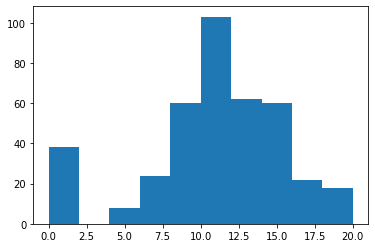

In [48]:
Target = student_data['G3']
plt.hist(Target)
plt.show()

Most of data are in normal distribution except the one with the value of zero.

In [49]:
Target.value_counts().sort_values()

4      1
20     1
19     5
17     6
5      7
7      9
18    12
6     15
16    16
14    27
9     28
12    31
13    31
8     32
15    33
0     38
11    47
10    56
Name: G3, dtype: int64

It can be found that there are 38 records with G3 = 0. It may be a result of student mising the exam. We may need to delete these data in the modeling. We may still use them to analyze the features.

In [50]:
student_data[student_data['G3']==0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


### 2.6.2 Number Of Missing or Duplicated Values By Column<a id='2.6.2_Number_Of_Missing_or_Duplicated_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [156]:
#Call the info method to see a summary of the data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

It can be found that **there is no missing values in the dataset**. We can double check in the cell below.

In [15]:
student_data.isnull().sum()  

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We now check the duplicates.

In [38]:
student_data.T.duplicated(keep=False).sum()

0

In [37]:
student_data.duplicated(keep=False).sum()

0

There is no duplicated rows or columns.

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [51]:
student_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [61]:
# Use `select_dtypes` method to select columns of dtype 'object'
categorical_data = student_data.select_dtypes('object')
categorical_data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


There are 17 categorical features in the dataset.

#### 2.6.3.1 Uniqueness of categorical features<a id='2.6.3.1_Uniqueness_of_categorical_features'></a>

Below is to find and filter unexpected values associated with categorical features.

In [91]:
for i in range(len(categorical_data.columns)):
    
    print(categorical_data.iloc[:,i].value_counts()/395*100)

GP    88.35443
MS    11.64557
Name: school, dtype: float64
F    52.658228
M    47.341772
Name: sex, dtype: float64
U    77.721519
R    22.278481
Name: address, dtype: float64
GT3    71.139241
LE3    28.860759
Name: famsize, dtype: float64
T    89.620253
A    10.379747
Name: Pstatus, dtype: float64
other       35.696203
services    26.075949
at_home     14.936709
teacher     14.683544
health       8.607595
Name: Mjob, dtype: float64
other       54.936709
services    28.101266
teacher      7.341772
at_home      5.063291
health       4.556962
Name: Fjob, dtype: float64
course        36.708861
home          27.594937
reputation    26.582278
other          9.113924
Name: reason, dtype: float64
mother    69.113924
father    22.784810
other      8.101266
Name: guardian, dtype: float64
no     87.088608
yes    12.911392
Name: schoolsup, dtype: float64
yes    61.265823
no     38.734177
Name: famsup, dtype: float64
no     54.177215
yes    45.822785
Name: paid, dtype: float64
yes    50.886076
no  

Compared to the column name infomation on UCI Machine Learning Repo, there is no unexpected values with the categorical feature.

#### 2.6.3.4 Distribution Of Categorical Features<a id='2.6.3.4'></a>

**Distribution of school, sex, address, and reason.**

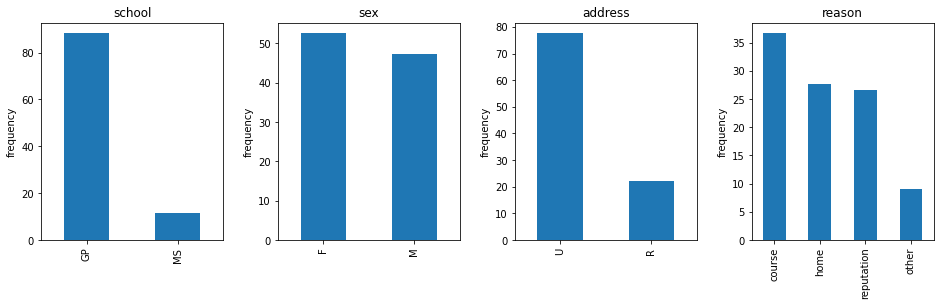

In [102]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
#Specify a series of barplot
(categorical_data.school.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('school')
ax[0].set_ylabel('frequency')

(categorical_data.sex.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('sex')
ax[1].set_ylabel('frequency')

(categorical_data.address.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('address')
ax[2].set_ylabel('frequency')

(categorical_data.reason.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('reason')
ax[3].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

**Distribution of famsize, Pstatus, Mjob, and Fjob.**

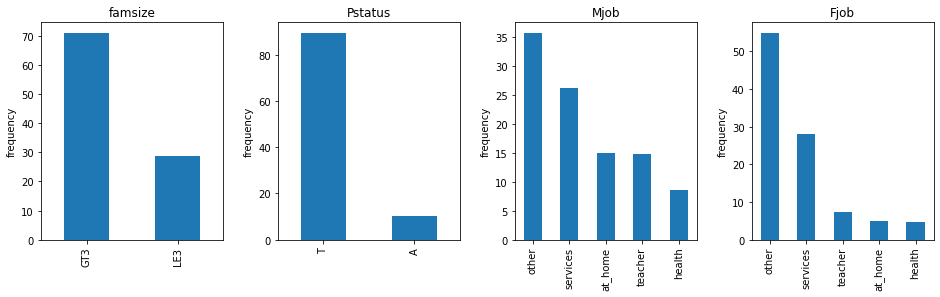

In [103]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
#Specify a series of barplot
(categorical_data.famsize.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('famsize')
ax[0].set_ylabel('frequency')

(categorical_data.Pstatus.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('Pstatus')
ax[1].set_ylabel('frequency')

(categorical_data.Mjob.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('Mjob')
ax[2].set_ylabel('frequency')

(categorical_data.Fjob.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('Fjob')
ax[3].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

**Distribution of guardian, schoolsup, famsup, and paid.**

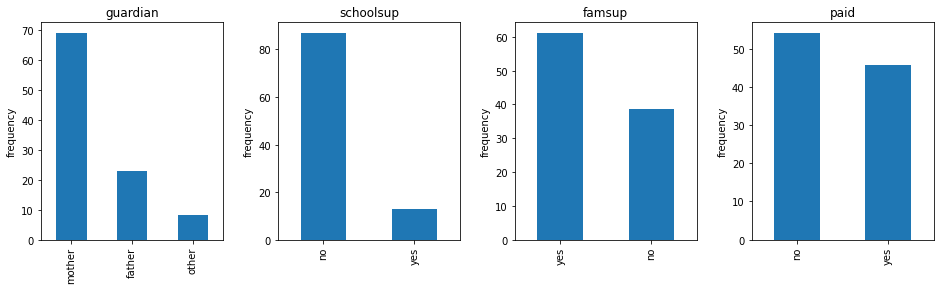

In [104]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
#Specify a series of barplot
(categorical_data.guardian.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('guardian')
ax[0].set_ylabel('frequency')

(categorical_data.schoolsup.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('schoolsup')
ax[1].set_ylabel('frequency')

(categorical_data.famsup.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('famsup')
ax[2].set_ylabel('frequency')

(categorical_data.paid.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('paid')
ax[3].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

**Distribution of activities, nursery, higher, internet, and romantic.**

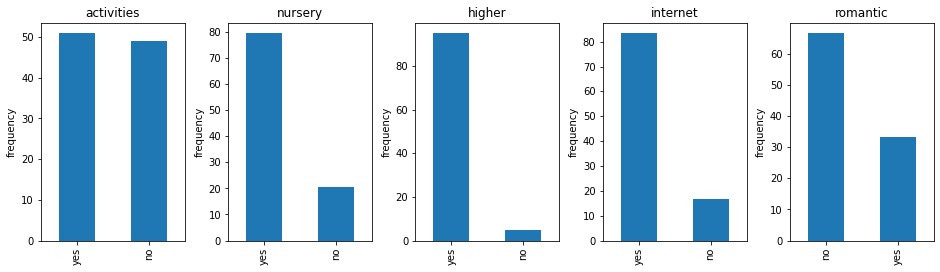

In [105]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))
#Specify a series of barplot
(categorical_data.activities.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('activities')
ax[0].set_ylabel('frequency')

(categorical_data.nursery.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('nursery')
ax[1].set_ylabel('frequency')

(categorical_data.higher.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('higher')
ax[2].set_ylabel('frequency')

(categorical_data.internet.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('internet')
ax[3].set_ylabel('frequency')

(categorical_data.romantic.value_counts()/395*100).plot(kind='bar', ax=ax[4])
ax[4].set_title('romantic')
ax[4].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

#### 2.6.3.5 Distribution Of G3 By School<a id='2.6.3.5'></a>

We use school as an example to demonstrate the distribution of G3 on categorical features. Note that the rows with G3=0 have been droped from the plot below.

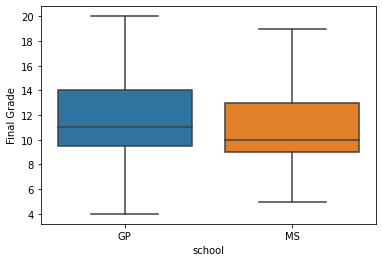

In [132]:
sns.boxplot(x='school', y='G3', data=student_data[student_data['G3'] !=0])
plt.xticks(rotation=0)
plt.ylabel('Final Grade')
plt.xlabel('school');

Students' G3 grade in GP school is slightly higer but more diverse than that in MS school. One possible reason for the diversity in GP school is that it accounts for 88.4% of data and MS school only accounts for 11.6% of data.

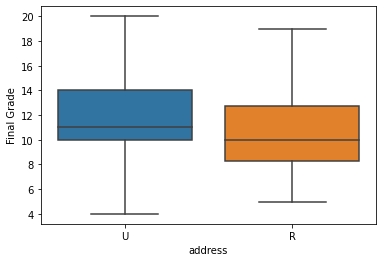

In [133]:
sns.boxplot(x='address', y='G3', data=student_data[student_data['G3'] !=0])
plt.xticks(rotation=0)
plt.ylabel('Final Grade')
plt.xlabel('address');

The above figure shows similar trend for address. Students living in urban (U) area perform slightly better than students living in rural (R) area. Note that 77.7% of students live in urban while 22.3% live in rural area.

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

Having decided to reserve judgement on how exactly you utilize the State, turn your attention to cleaning the numeric features.

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [242]:
#Code task 17#
#Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

In [243]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. You will definitely want to drop the records for which you have no price information, however you will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

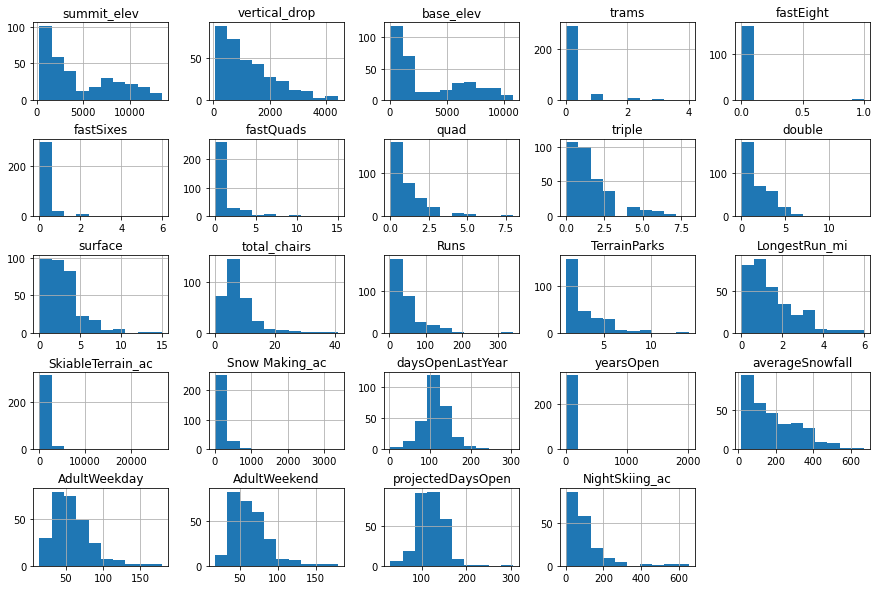

In [244]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [245]:
#Code task 19#
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

**Q: 2** One resort has an incredibly large skiable terrain area! Which is it?

In [246]:
#Code task 20#
#Now you know there's only one, print the whole row to investigate all values, including seeing the resort name
#Hint: don't forget the transpose will be helpful here
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


**A: 2** Silverton Mountain has an incredibly large skiable terrain area!

I found that the skiable acres is listed as 26,819 on Silverton Montain officil website. You may check the link below. The wikipedia says the skiable acres are 1,819. Which one we should use? If we use the skiable acres of 26819, can we simply drop it because it is way larger than other data?
https://silvertonmountain.com/mountain/stats/


But what can you do when you have one record that seems highly suspicious?

You can see if your data are correct. Search for "silverton mountain skiable area". If you do this, you get some [useful information](https://www.google.com/search?q=silverton+mountain+skiable+area).

![Silverton Mountain information](images/silverton_mountain_info.png)

You can spot check data. You see your top and base elevation values agree, but the skiable area is very different. Your suspect value is 26819, but the value you've just looked up is 1819. The last three digits agree. This sort of error could have occured in transmission or some editing or transcription stage. You could plausibly replace the suspect value with the one you've just obtained. Another cautionary note to make here is that although you're doing this in order to progress with your analysis, this is most definitely an issue that should have been raised and fed back to the client or data originator as a query. You should view this "data correction" step as a means to continue (documenting it carefully as you do in this notebook) rather than an ultimate decision as to what is correct.

In [247]:
#Code task 21#
#Use the .loc accessor to print the 'SkiableTerrain_ac' value only for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [248]:
#Code task 22#
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [249]:
#Code task 23#
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

**NB whilst you may become suspicious about your data quality, and you know you have missing values, you will not here dive down the rabbit hole of checking all values or web scraping to replace missing values.**

What does the distribution of skiable area look like now?

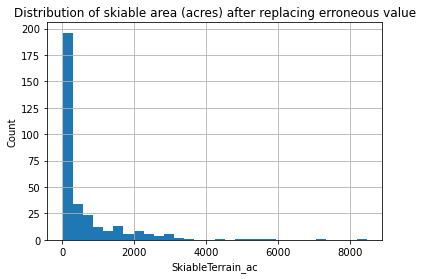

In [250]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

You now see a rather long tailed distribution. You may wonder about the now most extreme value that is above 8000, but similarly you may also wonder about the value around 7000. If you wanted to spend more time manually checking values you could, but leave this for now. The above distribution is plausible.

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [251]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [252]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


You can adopt a similar approach as for the suspect skiable area value and do some spot checking. To save time, here is a link to the website for [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). From this you can glean that you have values for skiable terrain that agree. Furthermore, you can read that snowmaking covers 60% of the trails.

What, then, is your rough guess for the area covered by snowmaking?

In [253]:
.6 * 4800

2880.0

This is less than the value of 3379 in your data so you may have a judgement call to make. However, notice something else. You have no ticket pricing information at all for this resort. Any further effort spent worrying about values for this resort will be wasted. You'll simply be dropping the entire row!

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [254]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [255]:
#Code task 24#
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns=['fastEight'], inplace=True)

In [256]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


What about yearsOpen? How many resorts have purportedly been open for more than 100 years?

In [257]:
#Code task 25#
#Filter the 'yearsOpen' column for values greater than 100
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

Okay, one seems to have been open for 104 years. But beyond that, one is down as having been open for 2019 years. This is wrong! What shall you do about this?

What does the distribution of yearsOpen look like if you exclude just the obviously wrong one?

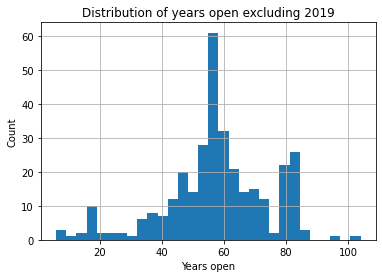

In [258]:
#Code task 26#
#Call the hist method on 'yearsOpen' after filtering for values under 1000
#Pass the argument bins=30 to hist(), but feel free to explore other values
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible, including the 104 year value. You can certainly state that no resort will have been open for 2019 years! It likely means the resort opened in 2019. It could also mean the resort is due to open in 2019. You don't know when these data were gathered!

Let's review the summary statistics for the years under 1000.

In [259]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

The smallest number of years open otherwise is 6. You can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, you would be adding a new youngest resort so it feels best to simply drop this row.

In [260]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

The other features you had mild concern over, you will not investigate further. Perhaps take some care when using these features.

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

You have, by this point removed one row, but it was for a resort that may not have opened yet, or perhaps in its first season. Using your business knowledge, you know that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does a resort dominate the available night skiing in a state? Or does it account for a large proportion of the total skiable terrain or days open?

If you want to add any features to your data that captures the state-wide market size, you should do this now, before dropping any more rows. In the next section, you'll drop rows with missing price information. Although you don't know what those resorts charge for their tickets, you do know the resorts exists and have been open for at least six years. Thus, you'll now calculate some state-wide summary statistics for later use.

Many features in your data pertain to chairlifts, that is for getting people around each resort. These aren't relevant, nor are the features relating to altitudes. Features that you may be interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

When you think about it, these are features it makes sense to sum: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. You might consider the total number of ski runs, but understand that the skiable area is more informative than just a number of runs.

A fairly new groupby behaviour is [named aggregation](https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.25.0.html). This allows us to clearly perform the aggregations you want whilst also creating informative output column names.

In [261]:
#Code task 27#
#Add named aggregations for the sum of 'daysOpenLastYear', 'TerrainParks', and 'NightSkiing_ac'
#call them 'state_total_days_open', 'state_total_terrain_parks', and 'state_total_nightskiing_ac',
#respectively
#Finally, add a call to the reset_index() method (we recommend you experiment with and without this to see
#what it does)
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [262]:
state_summary.shape

(35, 6)

## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

You know there are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. You can calculate the number of price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing and 2 denotes that both are missing.

In [263]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

About 14% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [264]:
#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

In [265]:
ski_data.shape

(281, 26)

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

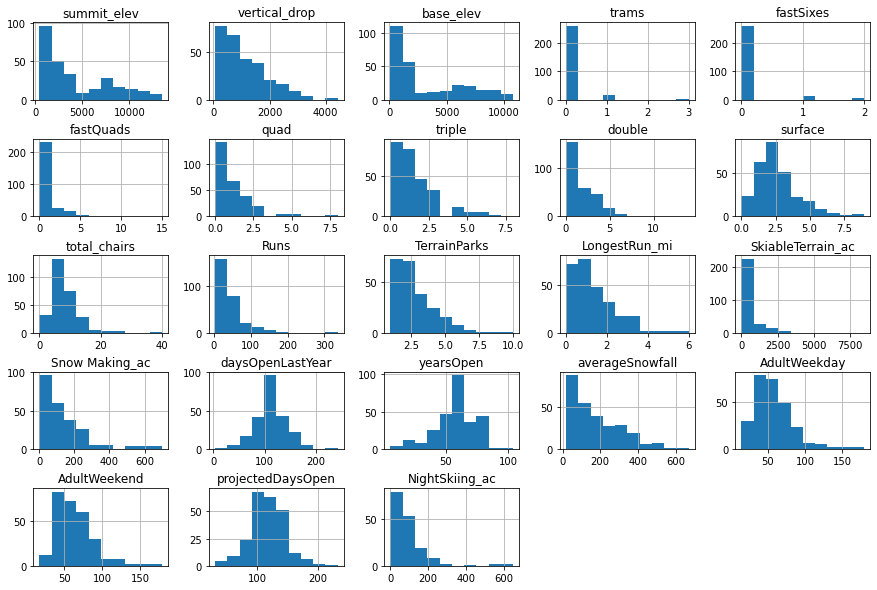

In [266]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

These distributions are much better. There are clearly some skewed distributions, so keep an eye on `fastQuads`, `fastSixes`, and perhaps `trams`. These lack much variance away from 0 and may have a small number of relatively extreme values.  Models failing to rate a feature as important when domain knowledge tells you it should be is an issue to look out for, as is a model being overly influenced by some extreme values. If you build a good machine learning pipeline, hopefully it will be robust to such issues, but you may also wish to consider nonlinear transformations of features.

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [267]:
#Code task 29#
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [268]:
type(usa_states)

list

In [269]:
len(usa_states)

1

In [270]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

Note, in even the last year, the capability of `pd.read_html()` has improved. The merged cells you see in the web table are now handled much more conveniently, with 'Phoenix' now being duplicated so the subsequent columns remain aligned. But check this anyway. If you extract the established date column, you should just get dates. Recall previously you used the `.loc` accessor, because you were using labels. Now you want to refer to a column by its index position and so use `.iloc`. For a discussion on the difference use cases of `.loc` and `.iloc` refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [271]:
#Code task 30#
#Use the iloc accessor to get the pandas Series for column number 4 from `usa_states`
#It should be a column of dates
established = usa_states.iloc[:, 4]

In [272]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [273]:
#Code task 31#
#Now use the iloc accessor again to extract columns 0, 5, and 6 and the dataframe's `copy()` method
#Set the names of these extracted columns to 'state', 'state_population', and 'state_area_sq_miles',
#respectively.
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


Do you have all the ski data states accounted for?

In [274]:
#Code task 32#
#Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

No?? 

If you look at the table on the web, you can perhaps start to guess what the problem is. You can confirm your suspicion by pulling out state names that _contain_ 'Massachusetts', 'Pennsylvania', or 'Virginia' from usa_states_sub:

In [277]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

Delete square brackets and their contents and try again:

In [278]:
#Code task 33#
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [279]:
#Code task 34#
#And now verify none of our states are missing by checking that there are no states in
#state_summary that are not in usa_states_sub (as earlier using `set()`)
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

Better! You have an empty set for missing states now. You can confidently add the population and state area columns to the ski resort data.

In [280]:
#Code task 35#
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_summary.merge(usa_states_sub, on='state', how='left')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


Having created this data frame of summary statistics for various states, it would seem obvious to join this with the ski resort data to augment it with this additional data. You will do this, but not now. In the next notebook you will be exploring the data, including the relationships between the states. For that you want a separate row for each state, as you have here, and joining the data this soon means you'd need to separate and eliminate redundances in the state data when you wanted it.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

Finally, what will your target be when modelling ticket price? What relationship is there between weekday and weekend prices?

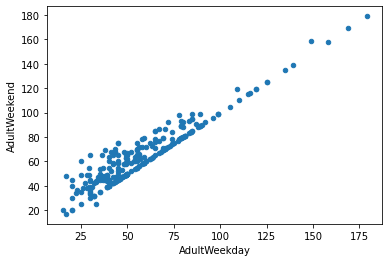

In [281]:
#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

A couple of observations can be made. Firstly, there is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. Recall from the boxplot earlier that the distribution for weekday and weekend prices in Montana seemed equal. Is this confirmed in the actual data for each resort? Big Mountain resort is in Montana, so the relationship between these quantities in this state are particularly relevant.

In [282]:
#Code task 37#
#Use the loc accessor on ski_data to print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


Is there any reason to prefer weekend or weekday prices? Which is missing the least?

In [283]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [284]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [285]:
ski_data.shape

(277, 25)

Perform a final quick check on the data.

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [286]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


These seem possibly curiously quantized...

In [287]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

Yes, the percentage of missing values per row appear in multiples of 4.

In [288]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

This is almost as if values have been removed artificially... Nevertheless, what you don't know is how useful the missing features are in predicting ticket price. You shouldn't just drop rows that are missing several useless features.

In [289]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [290]:
ski_data.shape

(277, 25)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [291]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\ski_data_cleaned.csv"


In [292]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\state_summary.csv"


## 2.13 Summary<a id='2.13_Summary'></a>

**Q: 3** Write a summary statement that highlights the key processes and findings from this notebook. This should include information such as the original number of rows in the data, whether our own resort was actually present etc. What columns, if any, have been removed? Any rows? Summarise the reasons why. Were any other issues found? What remedial actions did you take? State where you are in the project. Can you confirm what the target feature is for your desire to predict ticket price? How many rows were left in the data? Hint: this is a great opportunity to reread your notebook, check all cells have been executed in order and from a "blank slate" (restarting the kernel will do this), and that your workflow makes sense and follows a logical pattern. As you do this you can pull out salient information for inclusion in this summary. Thus, this section will provide an important overview of "what" and "why" without having to dive into the "how" or any unproductive or inconclusive steps along the way.

**A: 3** Your answer here
			
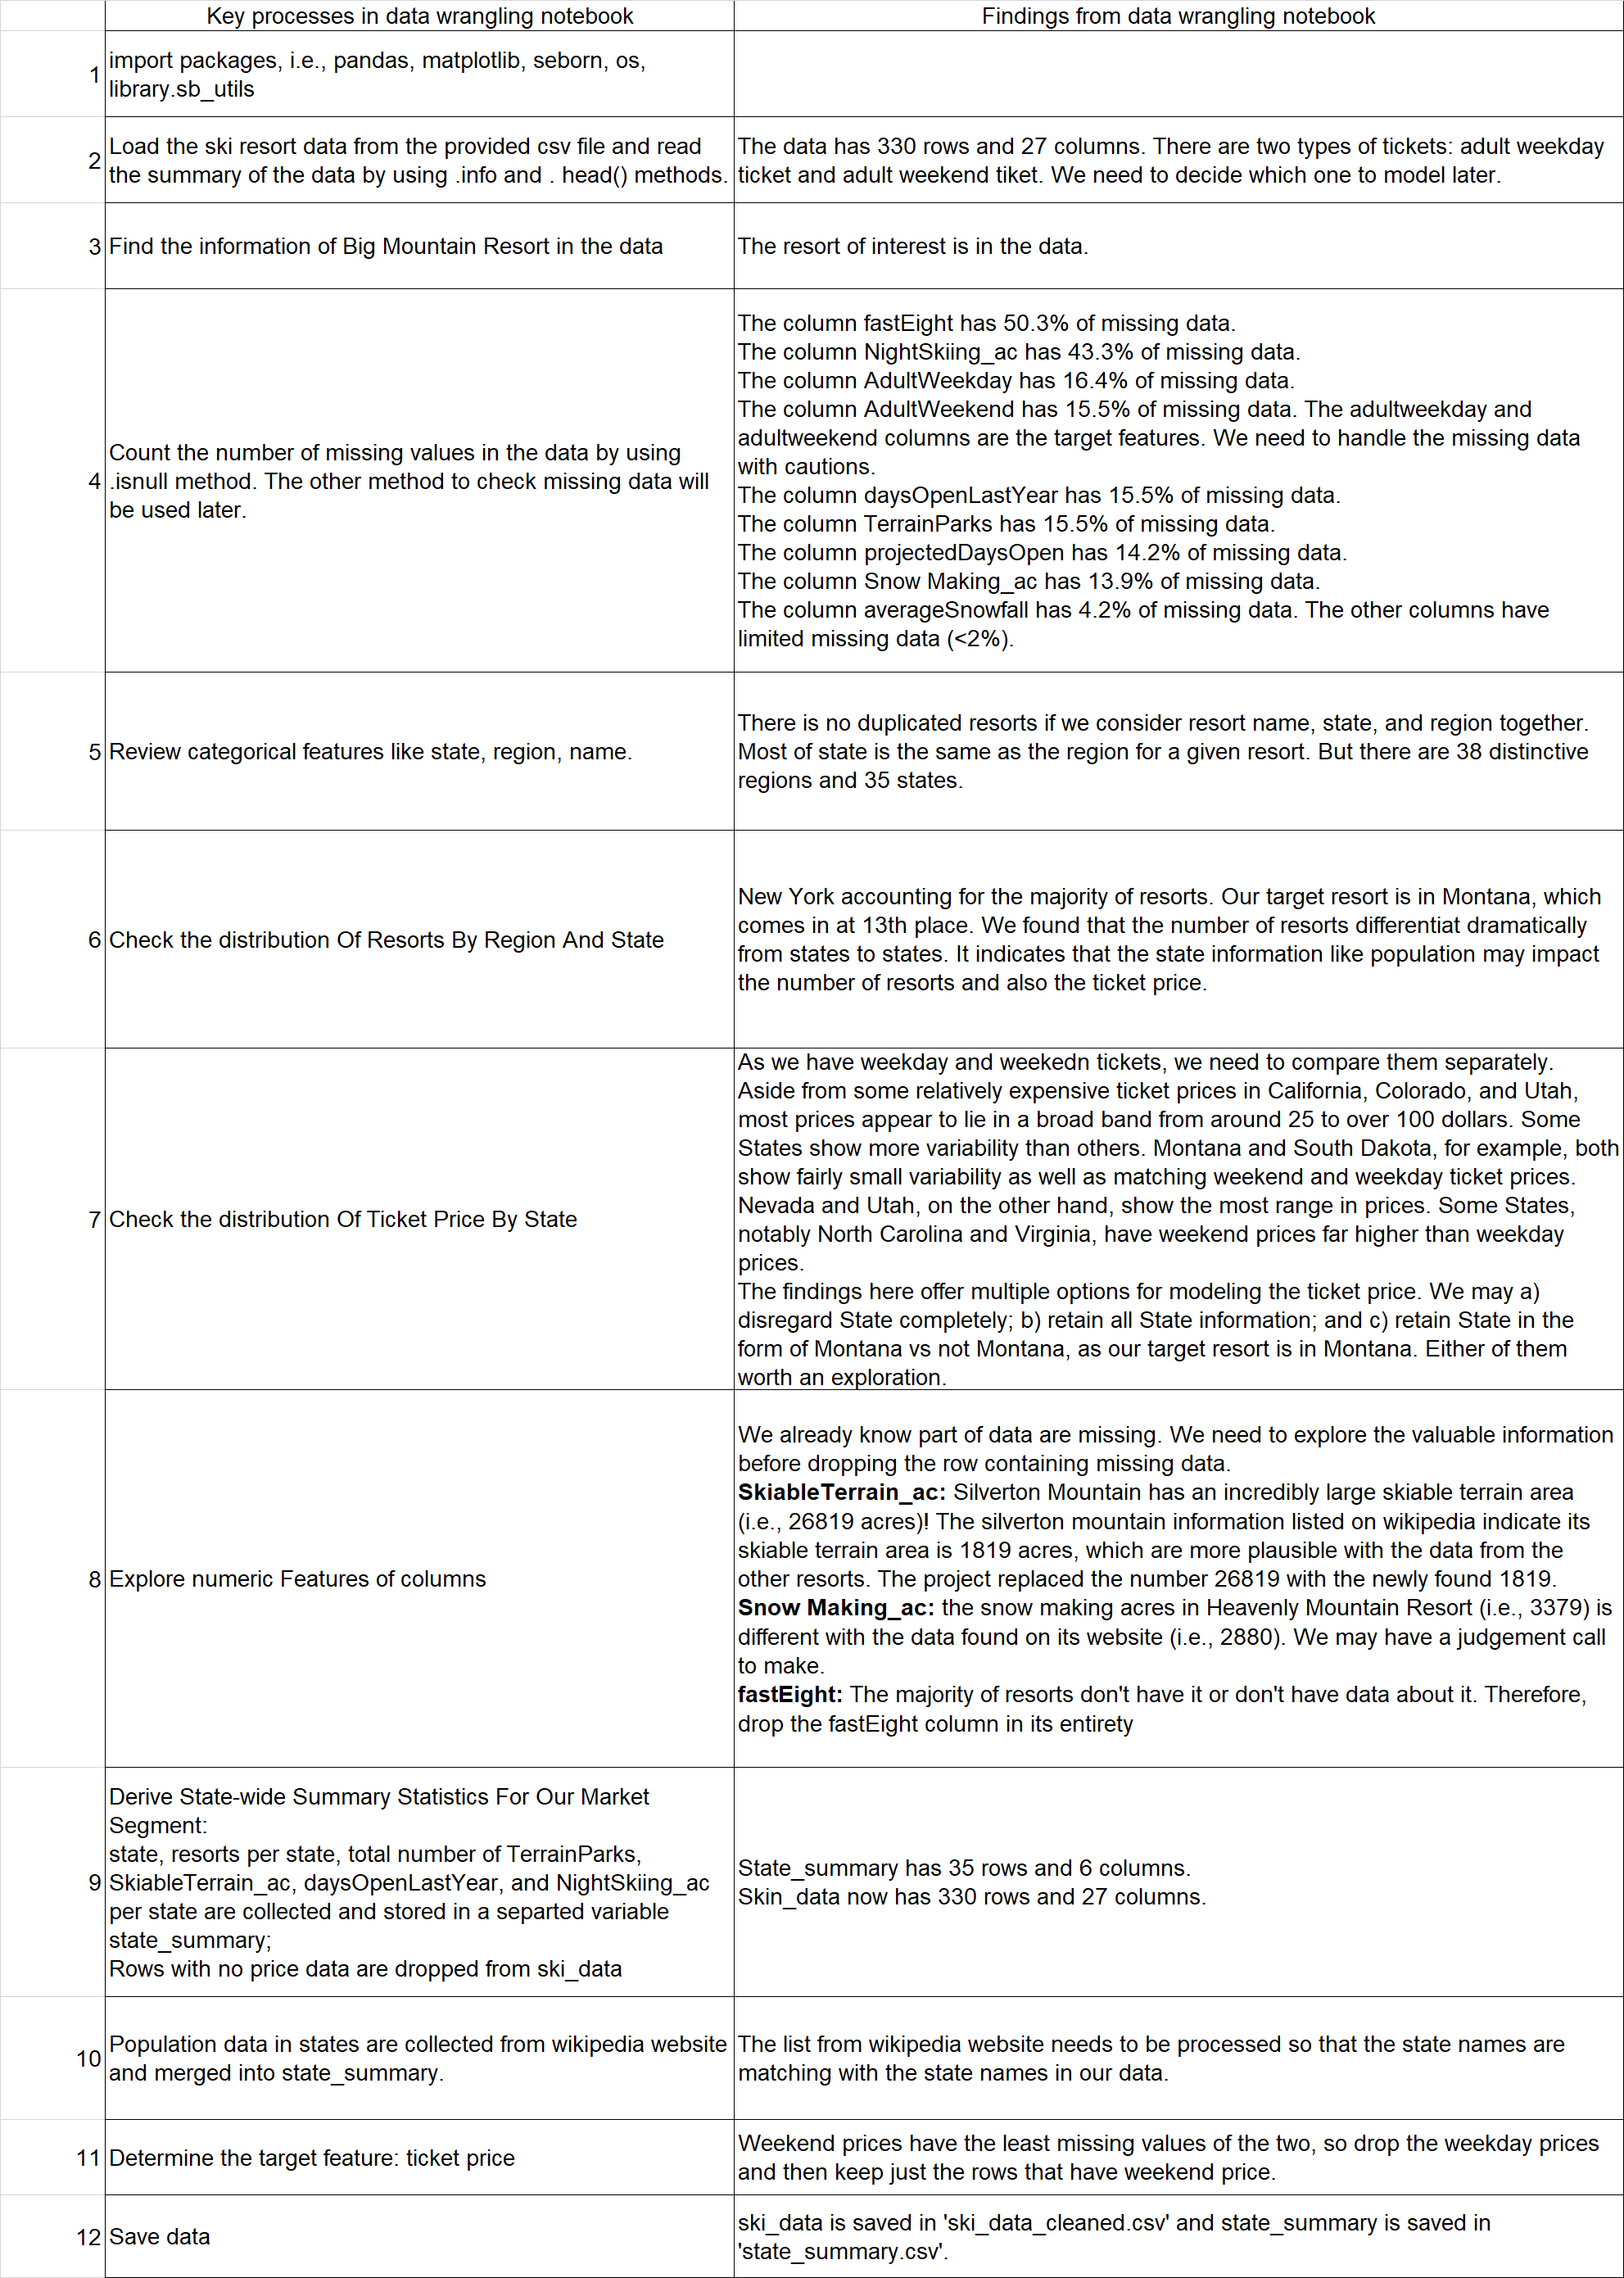
